In [1]:
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
from scipy.stats import spearmanr
import matplotlib.dates as mdates
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import operator
import warnings
import datetime
import calendar
import time
import math
import os
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('PHD-2009-2017.csv',sep=';', encoding='latin-1')

In [6]:
test = 5

In [4]:
data.head()

,Id,Date,Location,Country,Region,Overall Symptoms,Eye Symptoms,Eye Itching,Eye Foreign Body,Eye Redness,...,SPIR,STEM,TAXU,TILI,TRIG,TRIT,ULMU,URTI,VARI,ZEAM
0,165177,27.03.2017,NaN,RS,yuvojvod,9,2,0,0,0,...,-1.0,-1.0,06.Mär,0.0,-1.0,-1.0,0.5,0.0,-1.0,0.0
1,7402,28.04.2010,NaN,RS,yuvojvod,7,1,1,0,0,...,-1.0,-1.0,2.0,0.0,-1.0,-1.0,0.0,02.Feb,-1.0,0.0
2,24402,21.06.2012,NaN,RS,yuvojvod,7,1,1,0,0,...,-1.0,-1.0,01.Mai,02.Jun,-1.0,-1.0,0.0,134.0,-1.0,0.0
3,7892,14.05.2010,NaN,RS,yuvojvod,9,1,1,0,0,...,-1.0,-1.0,01.Mai,0.0,-1.0,-1.0,0.0,05.Apr,-1.0,0.0
4,7892,15.05.2010,NaN,RS,yuvojvod,9,2,1,0,0,...,-1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,1.0,-1.0,0.0


In [4]:
data.isnull().sum()

Id              0
Date            0
Location    30836
Country        64
Region          0
            ...  
TRIT           64
ULMU           64
URTI           64
VARI           64
ZEAM           64
Length: 100, dtype: int64

In [5]:
data = data.fillna(0)

In [6]:
data.shape

(33136, 100)

In [7]:
m, n = data.shape

# Task 1 -  Count data entries in available subset of PHD for each user and present them as histogram. Count entries per year and unique number of users per year and present them graphically.

In [8]:
dates = [] # Creating three new empty lists.
years = []
months = []
for i in range(m):
    dates.append(data.iloc[i,1]) # Adding strings from the second column to the list 'dates'.
    g = datetime.datetime.strptime(dates[i], "%d.%m.%Y") # Converting each item from 'dates' to datetime format.
    years.append(g.year) # Adding years to list 'years'.
    months.append(g.month) # Adding months to list 'months'.

In [9]:
counter1 = 2009
entries = []
years1 = []
for i in range(9): # Counter1 will go from 2009 to 2017
    print('In year',counter1,'there was',years.count(counter1),'entries.')
    entries.append(years.count(counter1)) # These two lists will help us visualize.
    years1.append(counter1)
    counter1 += 1

In year 2009 there was 905 entries.
In year 2010 there was 2296 entries.
In year 2011 there was 3669 entries.
In year 2012 there was 5190 entries.
In year 2013 there was 5617 entries.
In year 2014 there was 5623 entries.
In year 2015 there was 3686 entries.
In year 2016 there was 3677 entries.
In year 2017 there was 2473 entries.


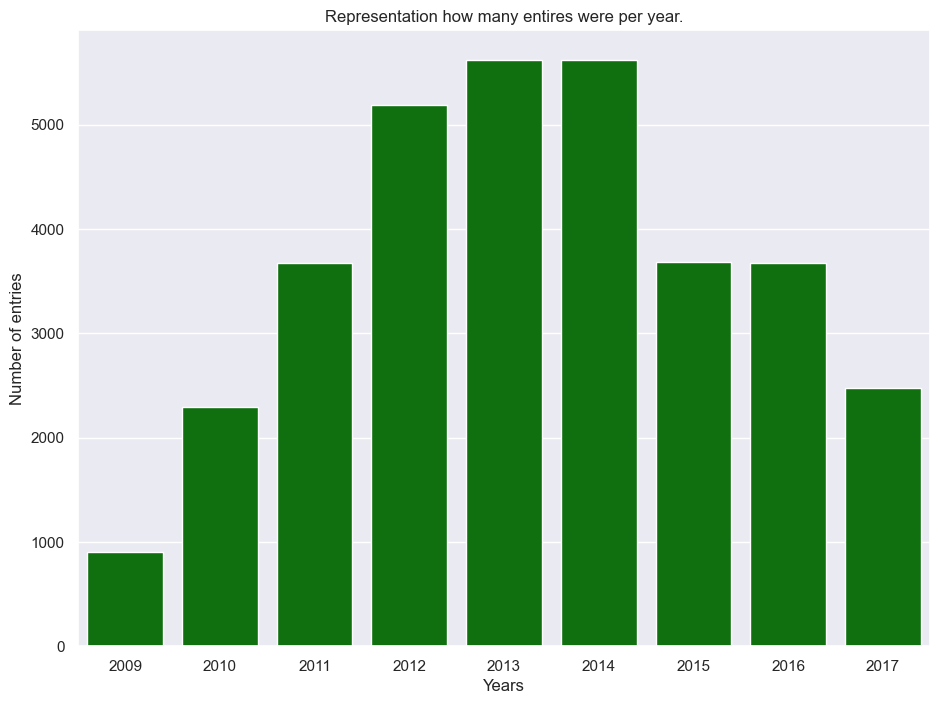

We can see that the least ammount of entries were in 2009. In 2013 and 2014 the application was used the most


In [10]:
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(years1,entries, color='green')
plt.xlabel('Years')
plt.ylabel('Number of entries')
plt.title('Representation how many entires were per year.')
plt.savefig("001.png", dpi=100)
plt.show()
print('We can see that the least ammount of entries were in 2009. In 2013 and 2014 the application was used the most')

In [11]:
def uniCount(x):
    ids = []
    for i in range(m):
        if years[i] == x:
            ids.append(data.iloc[i,0])
            gg = pd.Series(ids).value_counts()
            w = gg.shape
    nq.append(w[0])

In [12]:
nq = []
counter2 = 2009
for i in range(9):
    uniCount(counter2)
    counter2 += 1
nq

[125, 152, 169, 140, 136, 121, 122, 122, 100]

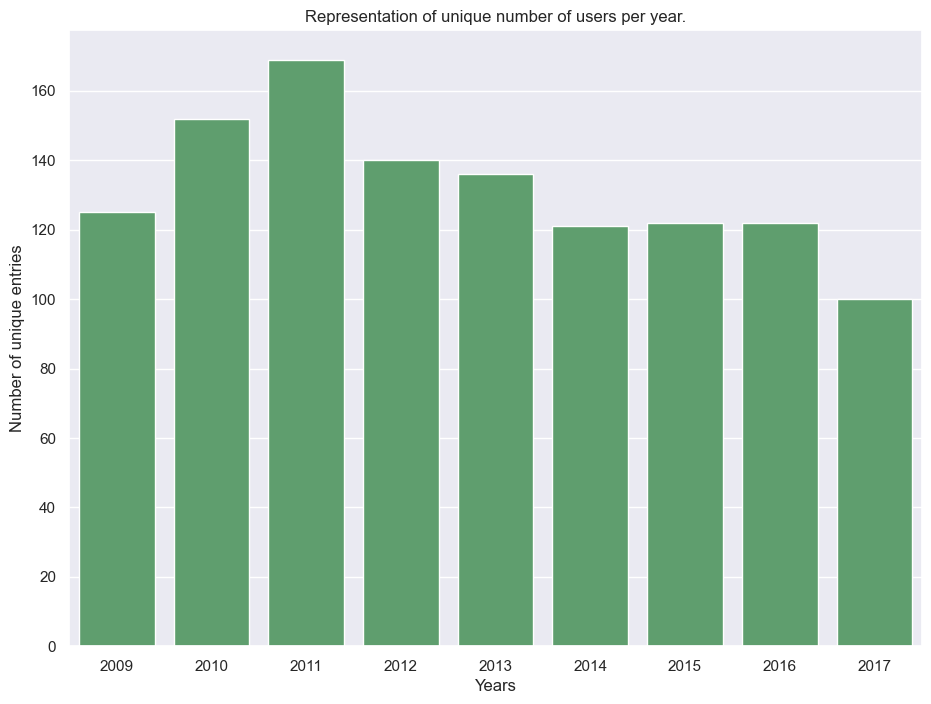

In [13]:
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(years1,nq, color='g')
plt.xlabel('Years')
plt.ylabel('Number of unique entries')
plt.title('Representation of unique number of users per year.')
plt.savefig("002.png", dpi=100)
plt.show()

# Task 2 - Measure correlations between different symptoms Eye Itching, Eye Redness, Nose Sneezing, Lungs Cough,… including also overall symptom score. Present pairwise correlations with heatmap.

In [14]:
data1 = data.iloc[:,6:28] # Making new data frame with the sympthoms.
data1.iloc[:,21] = data.iloc[:,33]
data1.columns.values[21] = "Overall Symptoms Total"

In [15]:
corrmat = data1.corr()
corrmat

,Eye Symptoms,Eye Itching,Eye Foreign Body,Eye Redness,Eye Watering,Eye Total 1,Eye Total 2,Nose Symptoms,Nose Itching,Nose Sneezing,...,Nose Total 1,Nose Total 2,Lungs Symptoms,Lungs Wheezing,Lungs Shortness of Breath,Lungs Cough,Lungs Asthma,Lungs Total 1,Lungs Total 2,Overall Symptoms Total
Eye Symptoms,1.000000,0.751892,0.537832,0.610467,0.586029,0.960287,0.909751,0.621368,0.483052,0.449939,...,0.634301,0.611076,0.333292,0.235048,0.231305,0.229734,0.046332,0.320841,0.320841,0.791877
Eye Itching,0.751892,1.000000,0.335452,0.392036,0.383507,0.794269,0.730786,0.487708,0.492002,0.415824,...,0.534257,0.495657,0.223968,0.177607,0.178137,0.159311,-0.027389,0.213073,0.213073,0.632356
Eye Foreign Body,0.537832,0.335452,1.000000,0.348550,0.249133,0.617920,0.593974,0.336124,0.306000,0.250676,...,0.359110,0.355892,0.160891,0.130461,0.161615,0.100313,0.006555,0.162114,0.162114,0.478603
Eye Redness,0.610467,0.392036,0.348550,1.000000,0.430900,0.706138,0.683996,0.371154,0.333546,0.292120,...,0.407036,0.407672,0.233602,0.178736,0.154361,0.201099,0.136765,0.257258,0.257258,0.565556
Eye Watering,0.586029,0.383507,0.249133,0.430900,1.000000,0.668726,0.619467,0.407854,0.304726,0.337818,...,0.452030,0.422405,0.238096,0.203924,0.159330,0.189634,0.049515,0.243779,0.243779,0.550347
Eye Total 1,0.960287,0.794269,0.617920,0.706138,0.668726,1.000000,0.943876,0.608399,0.515227,0.469440,...,0.644697,0.618767,0.323632,0.245262,0.236568,0.234645,0.050550,0.321003,0.321003,0.810126
Eye Total 2,0.909751,0.730786,0.593974,0.683996,0.619467,0.943876,1.000000,0.622462,0.495195,0.446892,...,0.649869,0.701500,0.372825,0.262855,0.250738,0.288311,0.142954,0.384015,0.384015,0.873510
Nose Symptoms,0.621368,0.487708,0.336124,0.371154,0.407854,0.608399,0.622462,1.000000,0.532611,0.619305,...,0.945404,0.919681,0.387710,0.240030,0.237233,0.298973,0.008905,0.360831,0.360831,0.838430
Nose Itching,0.483052,0.492002,0.306000,0.333546,0.304726,0.515227,0.495195,0.532611,1.000000,0.456443,...,0.651519,0.608662,0.166888,0.151650,0.160773,0.117267,-0.026791,0.166072,0.166072,0.571896
Nose Sneezing,0.449939,0.415824,0.250676,0.292120,0.337818,0.469440,0.446892,0.619305,0.456443,1.000000,...,0.746430,0.693968,0.213175,0.172677,0.146602,0.204292,0.017250,0.221504,0.221504,0.614613


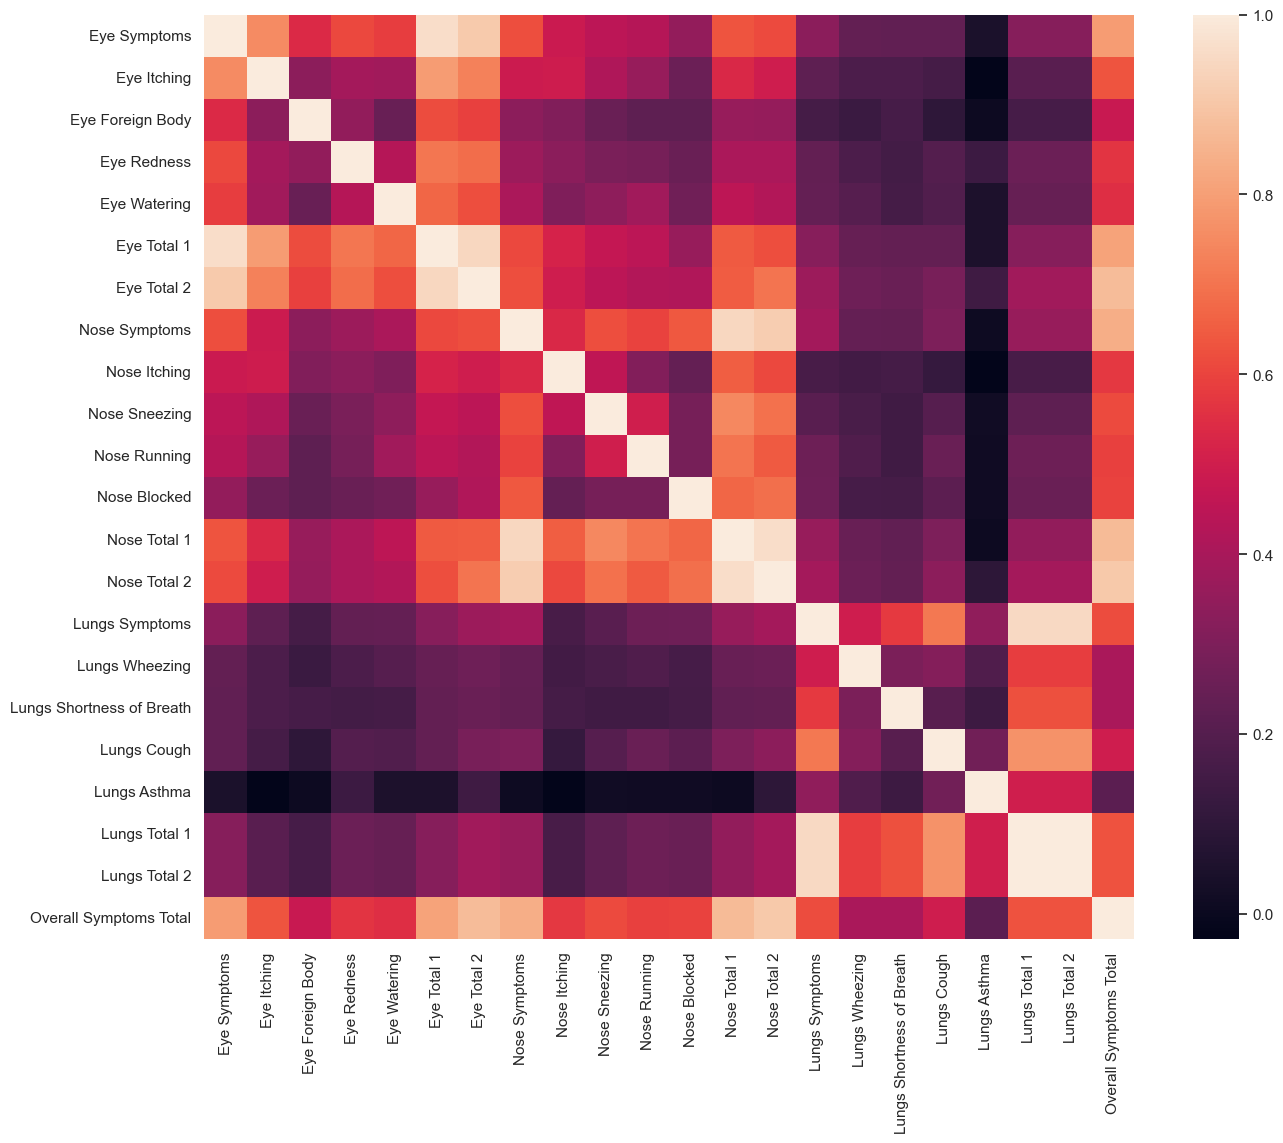

In [16]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(corrmat)
plt.savefig("003.png", dpi=150)
plt.show()

# Task 3 - Use boxplot to present overall symptoms on month level. Use bar graph to present counts of different medical treatments.

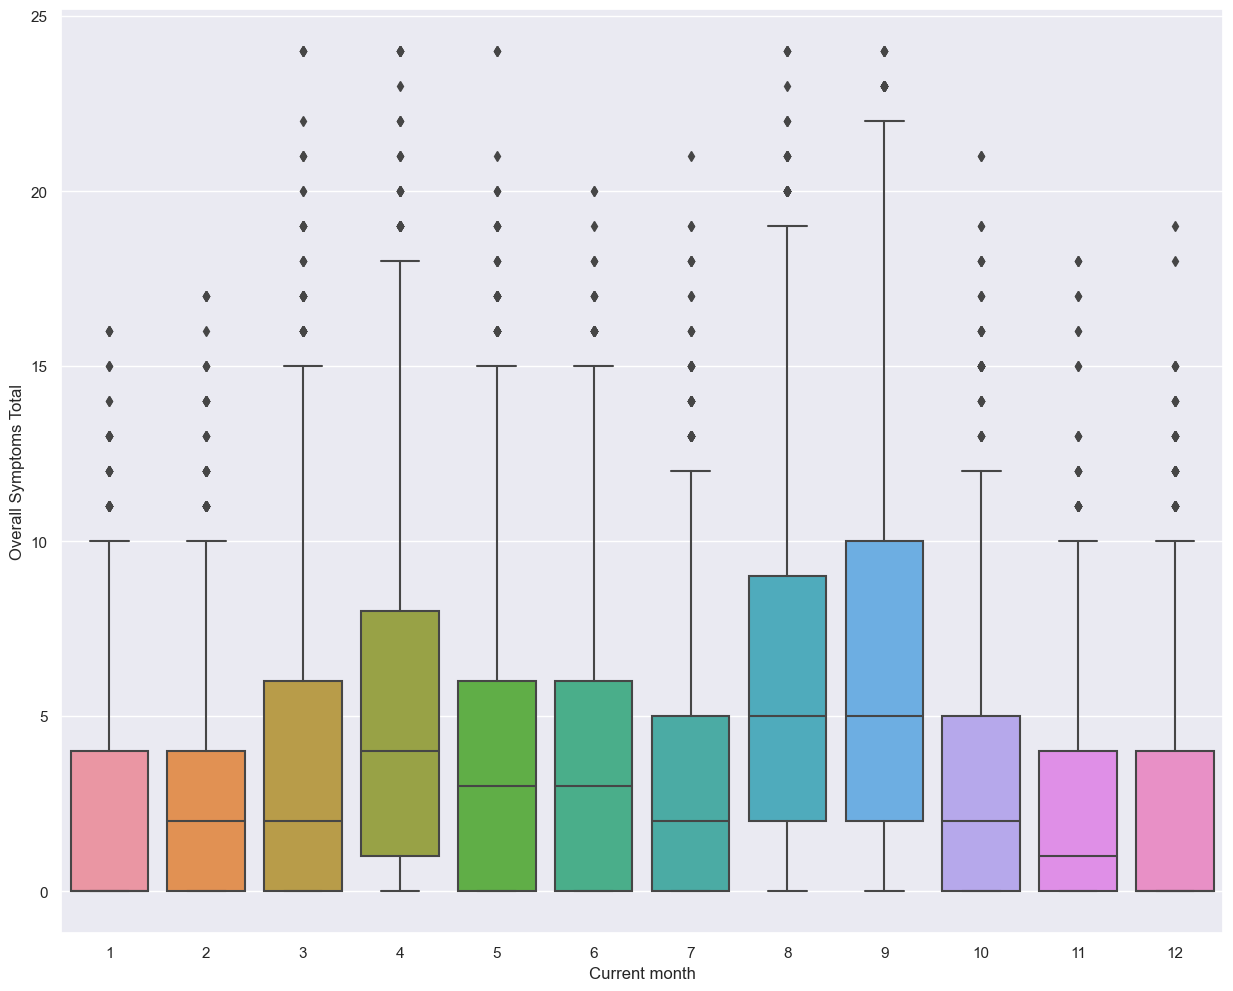

In [17]:
sns.boxplot(months,data.iloc[:,33]) # Column 34 have Overall Symptoms.
plt.xlabel('Current month')
plt.savefig("004.png", dpi=150)
plt.show()

In [18]:
medicine = []
medicinecount = []
for i in range(27,33):
    medicine.append(data.columns.values[i])
    medicinecount.append(sum(data.iloc[:,i]))

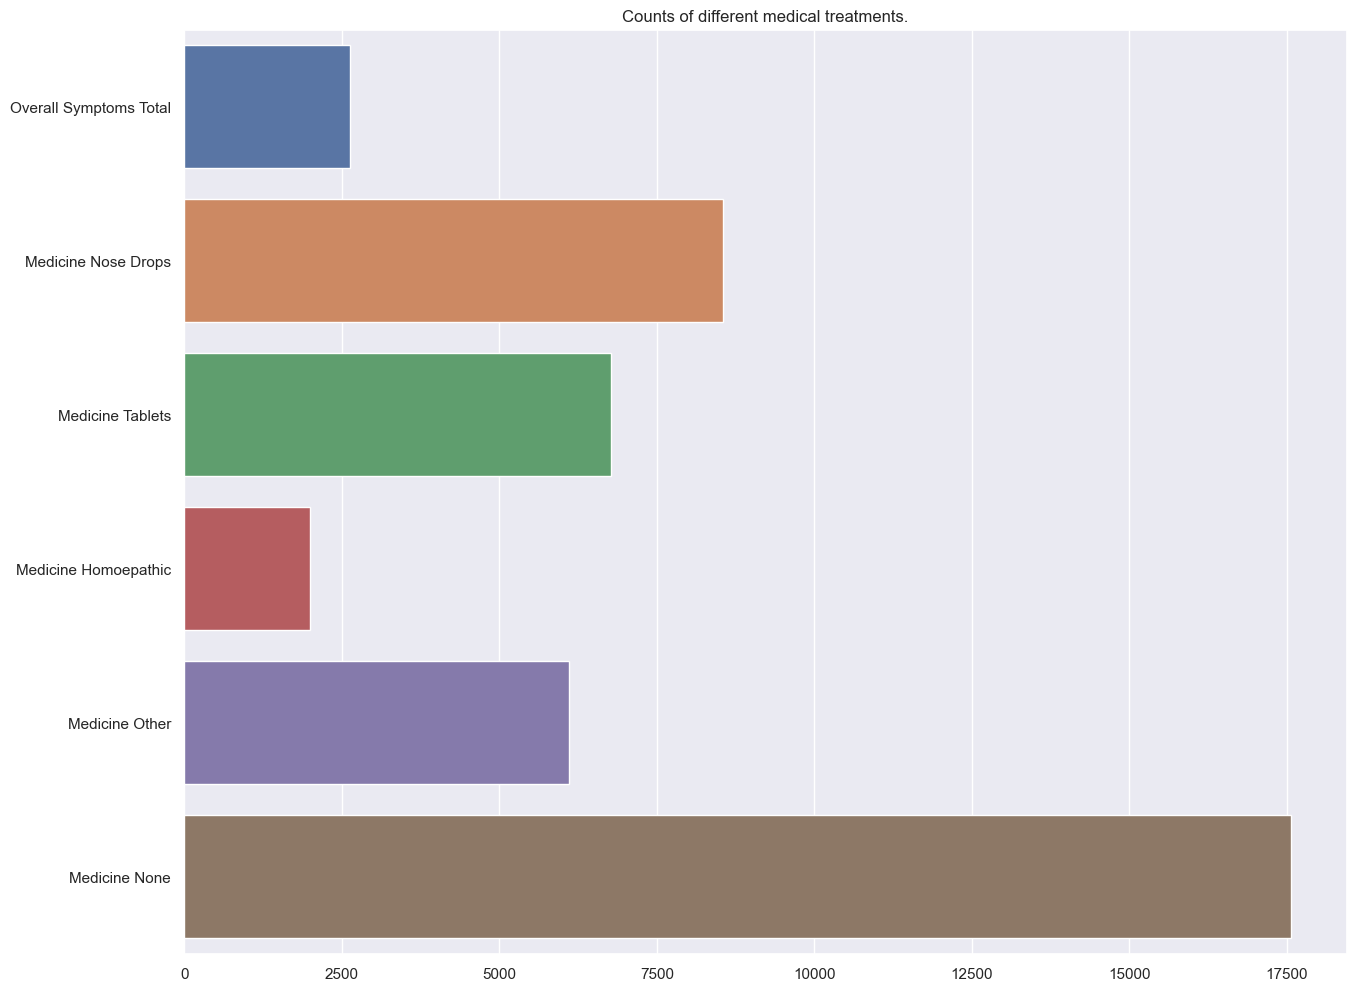

In [19]:
sns.barplot(medicinecount,medicine)
plt.title('Counts of different medical treatments.')
plt.savefig("005.png", dpi=150)
plt.show()

# Task 4 - Present daily measurements of levels of pollen (individual types of pollen and their overall sum).

In [20]:
rn17 = pd.read_excel('RSNOVI2017.xlsx',skiprows=1)
rn16 = pd.read_excel('RSNOVI2016.xlsx',skiprows=1)
rn15 = pd.read_excel('RSNOVI2015.xlsx',skiprows=1)
rn14 = pd.read_excel('RSNOVI2014.xlsx',skiprows=1)
rn13 = pd.read_excel('RSNOVI2013.xlsx',skiprows=1)
rn12 = pd.read_excel('RSNOVI2012.xlsx',skiprows=1)
rn11 = pd.read_excel('RSNOVI2011.xlsx',skiprows=1)
rn10 = pd.read_excel('RSNOVI2010.xlsx',skiprows=1)
rn09 = pd.read_excel('RSNOVI2009.xlsx',skiprows=1)

m1, n1 = rn17.shape

In [21]:
for i in range(m1): # Replacing string 'na' with zeros (missing values)
    for j in range(n1):
        if rn14.iloc[i,j] == 'na':
            rn14.iloc[i,j] = 0 # In place if rn14 we can insert rn09 to rn17 for different years

In [22]:
def generate(n):
    for i in range(n-1):
        sns.barplot(rn17.iloc[:,0],rn17.iloc[:,i+1])
        plt.xticks(np.linspace(0, 366, 12, endpoint=True)) # Representation of number of month.
        plt.xlabel('Current month')
        plt.show()

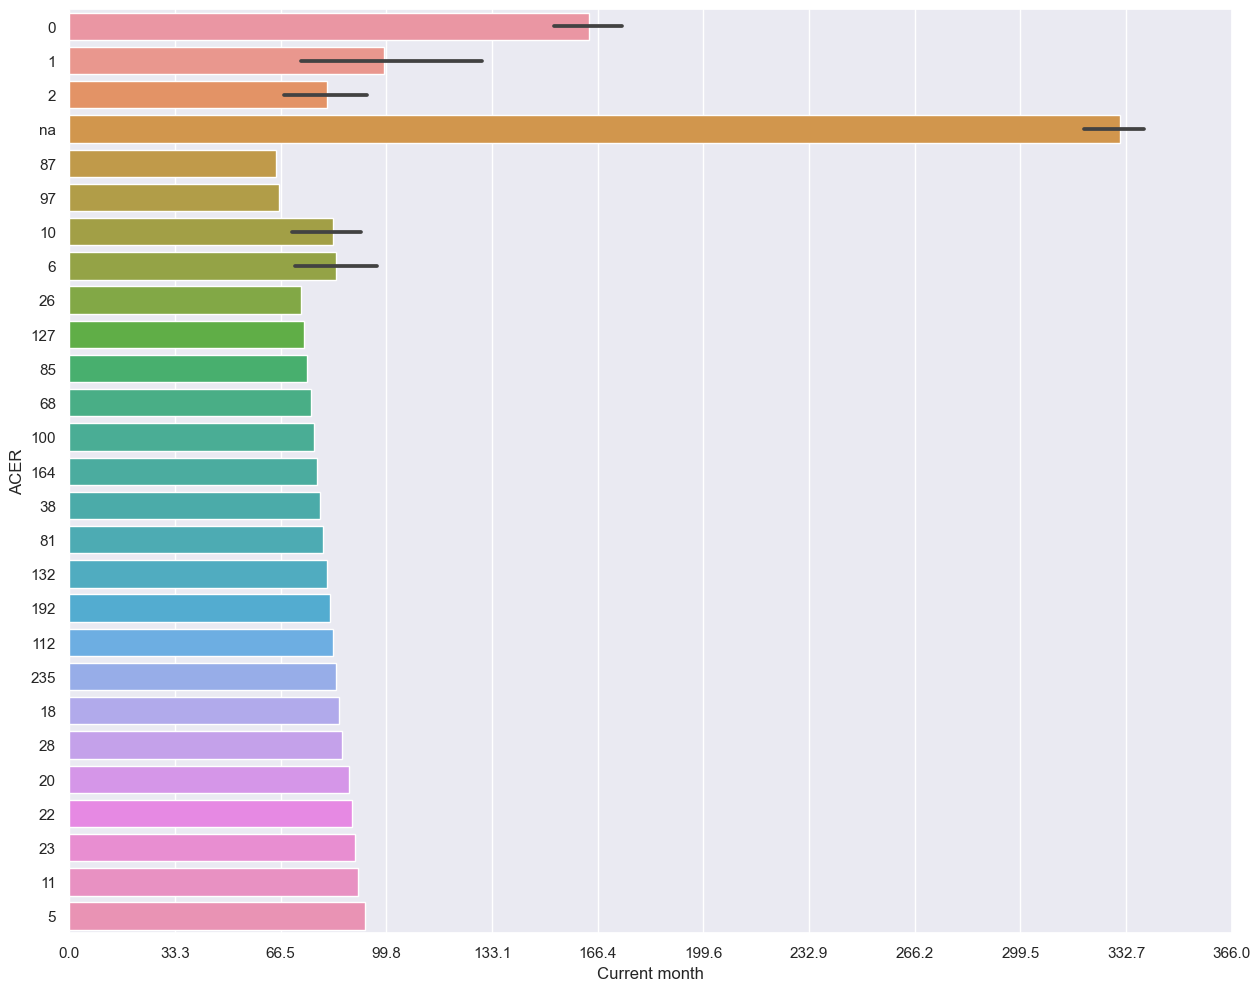

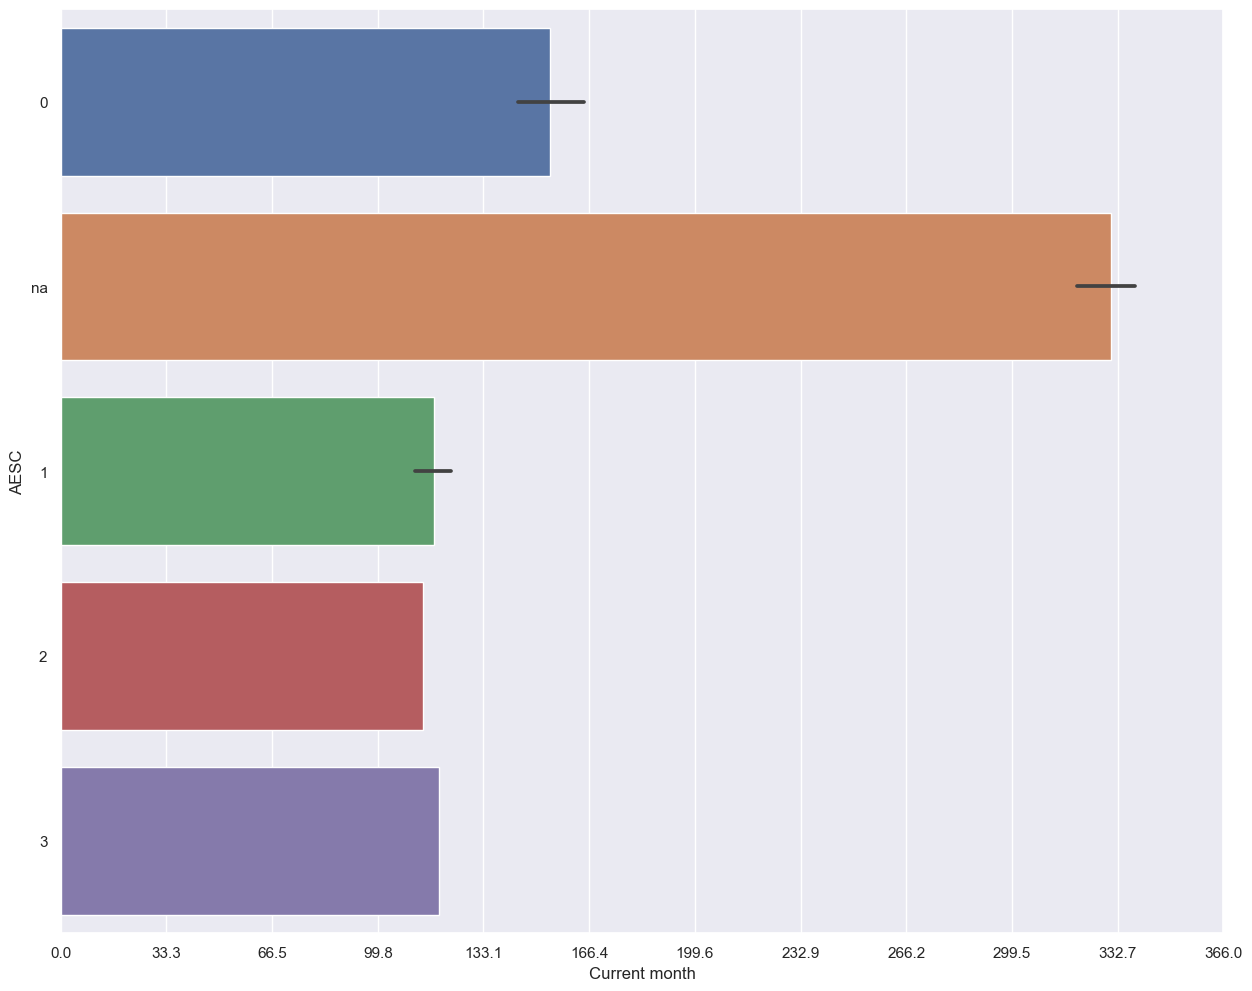

In [23]:
generate(3) # To generate all the data sue n1 in argument.

In [24]:
allinrow = []
for i in range(m1):
    b1 = 0
    for j in range(n1-1):
        b1 += rn14.iloc[i,j+1]
    allinrow.append(b1)

In [25]:
allinrow[:15]

[3, 1, 0, 0, 0, 0, 1, 0, 1, 7, 31, 29, 13, 9, 11]

<function matplotlib.pyplot.show(close=None, block=None)>

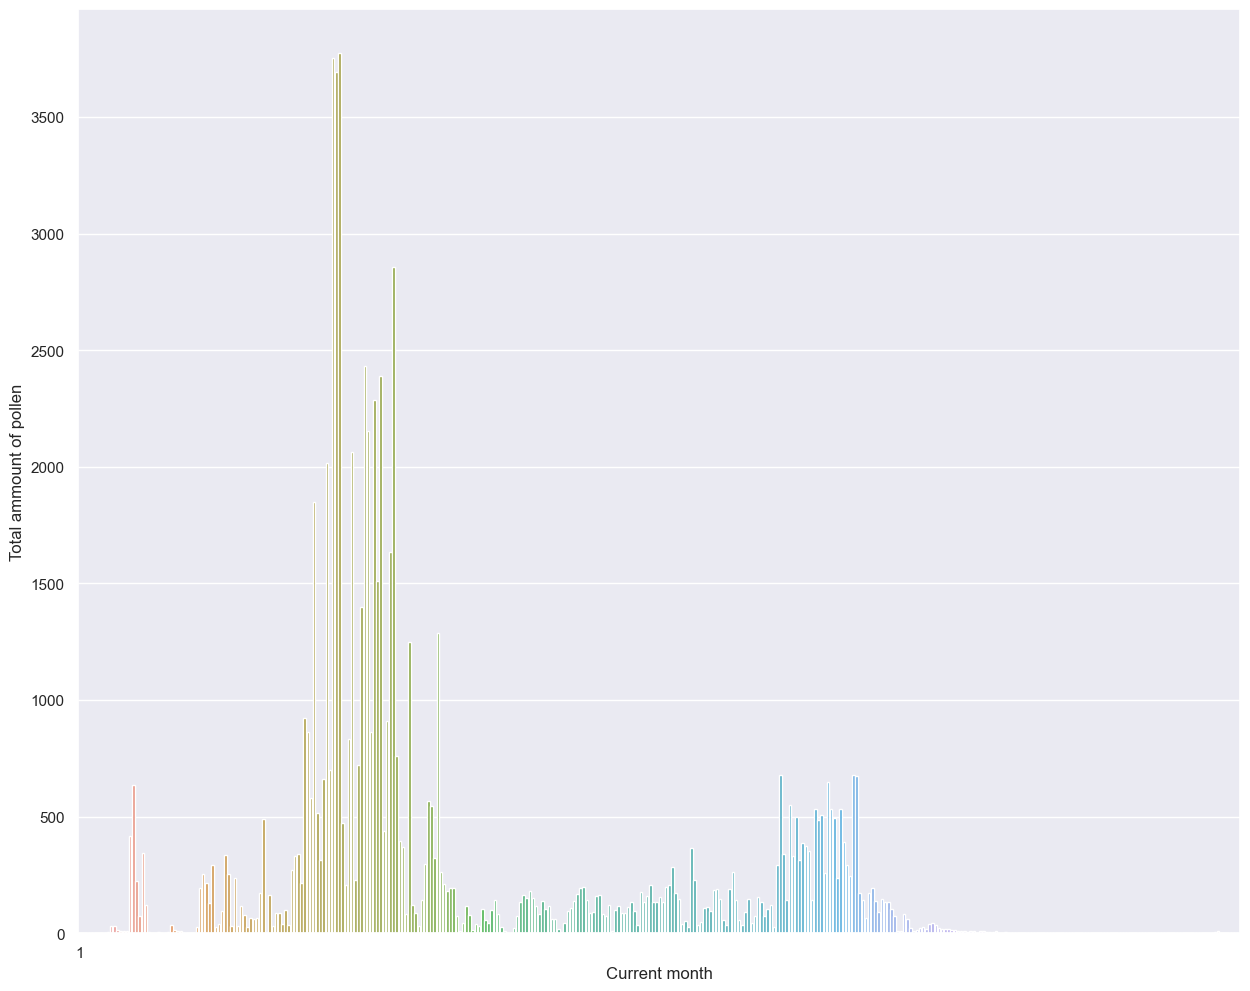

In [26]:
sns.set(rc={'figure.figsize':(15,12)})
sns.barplot(rn14.iloc[:,0],allinrow)
plt.xticks(np.linspace(0, 366, 12, endpoint=True))
plt.xlabel('Current month')
plt.ylabel('Total ammount of pollen')
plt.savefig("2014polen.png", dpi=150)
plt.show

In [27]:
rn17_1 = rn17.drop('Unnamed: 0', axis='columns')
rn17_1.head()

,ACER,AESC,ALNU,AMBR,ARTE,BETU,BROU,BUXU,CANN,CARP,...,QUER,RUME,SALI,TARA,TAXU,TILI,TYPH,ULMU,URTI,XANT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
for i in range(m1):
    for j in range(n1-1):
        if rn17_1.iloc[i,j] == 'na':
            rn17_1.iloc[i,j] = 0

In [29]:
summ = {}
columns1 = rn17_1.columns.tolist()
m2 = len(columns1)

for i in range(m2-1):
    summ[columns1[i+1]] = sum(rn17_1.iloc[:,i+1])
summ

{'AESC': 18,
 'ALNU': 470,
 'AMBR': 8442,
 'ARTE': 304,
 'BETU': 2827,
 'BROU': 4459,
 'BUXU': 3,
 'CANN': 349,
 'CARP': 46,
 'CAST': 21,
 'CELT': 73,
 'CHEN': 330,
 'CORY': 1280,
 'CYPE': 55,
 'FAGU': 11,
 'FRAX': 1014,
 'IVAA': 16,
 'JUGL': 643,
 'MORU': 7358,
 'PI': 1660,
 'PLAN': 207,
 'PLAT': 3735,
 'POAC': 1468,
 'POPU': 6708,
 'QUER': 1397,
 'RUME': 70,
 'SALI': 5965,
 'TARA': 12,
 'TAXU': 5001,
 'TILI': 216,
 'TYPH': 48,
 'ULMU': 389,
 'URTI': 5293,
 'XANT': 49}

In [30]:
pol1=max(summ.items(), key=operator.itemgetter(1))[0] # Wich pollen occurs the most in one year period.
pol2=min(summ.items(), key=operator.itemgetter(1))[0] # Wich pollen occurs the least in one year period.
print('Pollen which occurs the most in one year period is:',pol1)
print('Pollen which occurs the least in one year period is:',pol2)

Pollen which occurs the most in one year period is: AMBR
Pollen which occurs the least in one year period is: BUXU


# Task 5 - Measure Spearman correlations between different seasons of pollen.

In [31]:
spear = {}
columns2 = rn17_1.columns.tolist()

for col_a, col_b in itertools.combinations(columns2, 2):
    spear[col_a + ' and ' + col_b] = spearmanr(rn17_1.loc[:, col_a], rn17_1.loc[:, col_b])[0]

result2 = rn17_1.from_dict(spear, orient='index')
result2 = result2.iloc[n1-1:] # Removing the first n1 combination (days)
result2.columns = ['Spearman correlation']

result2

,Spearman correlation
AESC and AMBR,-0.111598
AESC and ARTE,-0.104154
AESC and BETU,0.312773
AESC and BROU,0.578222
AESC and BUXU,-0.018791
...,...
TYPH and URTI,0.364446
TYPH and XANT,-0.078064
ULMU and URTI,-0.244780
ULMU and XANT,-0.100412


In [32]:
strong = max(spear.items(), key=operator.itemgetter(1))[0] # Which two pollen seasons have the strongest corelation.
print(strong,'have the strongest correlation.')

JUGL and QUER have the strongest correlation.


# Task 6 -  For top 10 users according to their records in database present overall symptoms data along pollen concentration measurements. Also denote times when user takes some medical treatment.

In [33]:
userid = data.iloc[:,0].tolist()

In [34]:
def count_elements(lst):
    elements={}
    for elem in lst:
        if elem in elements.keys():
            elements[elem]+=1
        else:
            elements[elem]=1
    return elements 

In [35]:
hh = count_elements(userid)

In [36]:
top10 = sorted(hh.items(), key=operator.itemgetter(1),reverse=True)
top10 = top10[0:10] # The first number represents the user ID, the second number represents the occurence in data set.
top10

[(16796, 2259),
 (10021, 1515),
 (37561, 1308),
 (17507, 1303),
 (9862, 1197),
 (20686, 1120),
 (25782, 972),
 (89069, 736),
 (21089, 734),
 (2747, 717)]

In [37]:
print('User with id',top10[0][0],'entered his data',top10[0][1],'times in the application.')

User with id 16796 entered his data 2259 times in the application.


In [38]:
data3=data[['Id','Date','Overall Symptoms','Medicine Eye Drops','Medicine Nose Drops','Medicine Tablets','Medicine Homoepathic','Medicine Other']]

In [39]:
def svih10():
    for i in range(10):
        print('User with id',top10[i][0])
        ee=data3[(data3['Id'] == top10[i][0])]
        me,ne=ee.shape
        days1=np.zeros([me,4])
        for i in range(me):
            x=datetime.datetime.strptime(ee.iloc[i,1], "%d.%m.%Y")
            days1[i,0]=((x - datetime.datetime(x.year, 1, 1)).days + 1)
            days1[i,1]=x.year
            days1[i,2]=ee.iloc[i,2]
            days1[i,3]=ee.iloc[i,3]+ee.iloc[i,4]+ee.iloc[i,5]+ee.iloc[i,6]+ee.iloc[i,7]
        skill=2009
        for i in range(9):
            new1=[]
            new2=[]
            new3=[]
            for i in range(me):
                if days1[i,1]==skill:
                    new1.append(days1[i,0])
                    new2.append(days1[i,2])
                    new3.append(days1[i,3])
            if len(new1)>1:
                print(skill)
                plt.figure(figsize=(20,5))
                plt.scatter(new1,new2,alpha=0.6)
                plt.scatter(new1,new3,alpha=0.6)
                plt.xlim(-1,366)
                plt.xticks(np.linspace(0, 365, 12))
                plt.ylim(-1,10)
                plt.show()
            skill=skill+1

In [40]:
#svih10() # Generates the grapihcs